# Sample Code for HW5
# User-based and Item-based CF (Pearson Correlation Coefficient)
## Convert the rating file into a user-item matrix

In [1]:
import numpy as np
import pandas as pd

ratingfile = 'ratings.data'
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(ratingfile, sep='\t', names=header)

n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

user_item_matrix = np.zeros((n_users, n_items))
for line in df.itertuples():
    user_item_matrix[line[1] - 1, line[2] - 1] = line[3]
print(user_item_matrix)

Number of users = 943 | Number of movies = 1682
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [3]:
#cosine
user_item_matrix_cos=user_item_matrix.copy()
#Pre-compute the user-user similarity matrix 
for i in range(len(user_item_matrix_cos)):
    for j in range(len(user_item_matrix_cos[i])):
        #if element is zero,then skip.
        if user_item_matrix_cos[i][j]==0:
            continue
        #if element is nonzero,then substract the mean of sum nonzero value
        else:
            user_item_matrix_cos[i][j]=user_item_matrix_cos[i][j]-user_item_matrix_cos[i][np.where(user_item_matrix_cos[i]!=0)].mean()
print(user_item_matrix_cos)    
    

[[ 1.38970588 -0.59702098  0.41620336 ...  0.          0.
   0.        ]
 [ 0.29032258  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.95454545  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.58928571  0.         ...  0.          0.
   0.        ]]


In [4]:
import scipy.stats
import scipy.spatial
import math
from math import sqrt

#Write Cosin function
def cosine(ru,rv):
    return (ru@rv) / (((ru@ru)**.5) * ((rv@rv)**.5))

user_similarity_cos = np.zeros((n_users,n_users))

# compute the similarities in the upper triangle part
for user1 in range(n_users):
    for user2 in range(n_users):
        if(user1 <= user2):
            break
        try:
            user_similarity_cos[user1][user2] = cosine(user_item_matrix_cos[user1], user_item_matrix_cos[user2])
        except:
            user_similarity_cos[user1][user2] = 0
                
# complete all entries by  add the transposed similarity matrix to our
# previously computed values                
user_similarity_cos = user_similarity_cos + user_similarity_cos.T
#print(user_similarity_pearson)
print(user_similarity_cos)

[[0.         0.09244434 0.00171567 ... 0.07444113 0.05980103 0.20329836]
 [0.09244434 0.         0.01243077 ... 0.06839208 0.12013874 0.05749155]
 [0.00171567 0.01243077 0.         ... 0.00324127 0.06860065 0.01271675]
 ...
 [0.07444113 0.06839208 0.00324127 ... 0.         0.03649925 0.08119899]
 [0.05980103 0.12013874 0.06860065 ... 0.03649925 0.         0.09304765]
 [0.20329836 0.05749155 0.01271675 ... 0.08119899 0.09304765 0.        ]]


In [5]:
#Pre-compute the item-item similarity matrix 
item_item_matrix_cos=user_item_matrix.T.copy()
for i in range(len(item_item_matrix_cos)):
    for j in range(len(item_item_matrix_cos[i])):
        if item_item_matrix_cos[i][j]==0:
            continue
        else:
            item_item_matrix_cos[i][j]=item_item_matrix_cos[i][j]-item_item_matrix_cos[i][np.where(item_item_matrix_cos[i]!=0)].mean()
print(item_item_matrix_cos)  

[[ 1.12168142  0.13026177  0.         ...  3.57166602  0.
   0.        ]
 [-0.20610687  0.          0.         ...  0.          0.
   3.81601729]
 [ 0.96666667  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [6]:
user_item_matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [7]:
item_similarity_cos = np.zeros((n_items, n_items))
datas = user_item_matrix.T.copy()

# compute the similarities in the upper triangle part
for item1 in range(n_items):
    for item2 in range(n_items):
        if item1 <= item2:
            break
        try:
            item_similarity_cos[item1][item2] = cosine(datas[item1], datas[item2])
        except:
            item_similarity_cos[item1][item2] = 0
                
# complete all entries by  add the transposed similarity matrix to our
# previously computed values                
item_similarity_cos = item_similarity_cos + item_similarity_cos.T
print(item_similarity_cos)

[[0.         0.40238218 0.33024479 ... 0.         0.04718307 0.04718307]
 [0.40238218 0.         0.27306918 ... 0.         0.07829936 0.07829936]
 [0.33024479 0.27306918 0.         ... 0.         0.         0.09687505]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04718307 0.07829936 0.         ... 0.         0.         0.        ]
 [0.04718307 0.07829936 0.09687505 ... 0.         0.         0.        ]]


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# split the data set into training set and testing set
train_data, test_data = train_test_split(df, test_size=0.25)

In [9]:
#Rating predict function based on the the user-user similarity
def userbased_predict_rmse(train, test, user_similarity, n_users, n_items, k):
    
    print("Compute User-based CF RMSE .......", "K =", k)
    # transfer the train set of ratings to user-item matrix
    
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    train_matrix = np.zeros((n_users, n_items))
    for line in train.itertuples():
        train_matrix[int(line[1]) - 1, int(line[2]) - 1] = line[3]

    true_rate = []
    pred_rate = []

    for line in test.itertuples():
        user = int(line[1])
        item = int(line[2])
        true_rate.append(line[3])

        item_pred = 3.0

        if np.count_nonzero(train_matrix[user-1]):
            sim_cos = user_similarity[user - 1]
            # sort the similarities in descending order, find the k similar items which has the largest similarities
            sortedindex = np.argsort(-sim_cos)
            normal_cos = 0
            dot = 0
            for i in range(k):
                ind = sortedindex[i]
                # normalize the similarity for the rated items
                normal_cos += np.absolute(sim_cos[ind])
                # similarity multiply the ratings
                dot += sim_cos[ind] * train_matrix[ind][item-1]

            if normal_cos > 0:
                item_pred = dot / normal_cos

        if item_pred < 0:
            item_pred = 0

        if item_pred > 5:
            item_pred = 5

        pred_rate.append(item_pred)

    rmse= sqrt(mean_squared_error(true_rate, pred_rate))

    return rmse,pred_rate

In [10]:
#Rating predict function based on the the item-item similarity
def itembased_predict_rmse(train, test, item_similarity, n_users, n_items, k):
    print("Compute Item-based CF RMSE .......", "K =", k)
    # transfer the train set of ratings to user-item matrix
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    
    train_matrix = np.zeros((n_users, n_items))
    for line in train.itertuples():
        train_matrix[line[1] - 1, line[2] - 1] = line[3]

    true_rate = []
    pred_rate = []

    for line in test.itertuples():
        user = line[1]
        item = line[2]
        true_rate.append(line[3])

        item_pred = 3.0

        if np.count_nonzero(train_matrix[:, item - 1]):
            sim_cos_item = item_similarity[item - 1]
            # sort the similarities, find the k similar items which has the laest the similarities
            sortedindex = np.argsort(-sim_cos_item)
            normal_cos_item = 0
            dot = 0
            for i in range(k):
                ind = sortedindex[i]
                # normalize the similarity for the rated items
                normal_cos_item += np.absolute(sim_cos_item[ind])
                # similarity multiply the ratings
                dot += sim_cos_item[ind] * train_matrix[user - 1][ind]

            if normal_cos_item > 0:
                item_pred = dot / normal_cos_item

        if item_pred < 0:
            item_pred = 0

        if item_pred > 5:
            item_pred = 5

        pred_rate.append(item_pred)

    rmse= sqrt(mean_squared_error(true_rate, pred_rate))

    return rmse,pred_rate

## Pre-compute the user-user similarity matrix using pearson correlation
The user-user similarity matrix represents the similiarty between each user-user pair. **It is important to note that this computation may take around 10 minutes or more to complete.**

In [11]:
import scipy.stats
import scipy.spatial
import math
from math import sqrt

user_similarity_pearson = np.zeros((n_users, n_users))

# compute the similarities in the upper triangle part
for user1 in range(n_users):
    for user2 in range(n_users):
        if(user1 <= user2):
            break
        elif np.count_nonzero(user_item_matrix[user1]) and np.count_nonzero(user_item_matrix[user2]):
            try:
                if not math.isnan(scipy.stats.pearsonr(user_item_matrix[user1], user_item_matrix[user2])[0]):
                    user_similarity_pearson[user1][user2] = scipy.stats.pearsonr(user_item_matrix[user1], user_item_matrix[user2])[0]
                else:
                    user_similarity_pearson[user1][user2] = 0
            except:
                user_similarity_pearson[user1][user2] = 0
                
# complete all entries by  add the transposed similarity matrix to our
# previously computed values                
user_similarity_pearson = user_similarity_pearson + user_similarity_pearson.T
#print(user_similarity_pearson)

## Pre-compute the item-item similarity matrix using pearson correlation
The item-item similarity matrix represents the similiarty between each item-item pair. **It is important to note that this computation may take around 10 minutes or more to complete.**

In [12]:
item_similarity_pearson = np.zeros((n_items, n_items))
data = user_item_matrix.T.copy()
# compute the similarities in the upper triangle part
for item1 in range(n_items):
    for item2 in range(n_items):
        if item1 <= item2:
            break
        elif np.count_nonzero(data[item1]) and np.count_nonzero(data[item2]):
            try:
                if not math.isnan(scipy.stats.pearsonr(data[item1], data[item2])[0]):
                    item_similarity_pearson[item1][item2] = scipy.stats.pearsonr(data[item1], data[item2])[0]
                else:
                    item_similarity_pearson[item1][item2] = 0
            except:
                item_similarity_pearson[item1][item2] = 0
                
# complete all entries by  add the transposed similarity matrix to our
# previously computed values                
item_similarity_pearson = item_similarity_pearson + item_similarity_pearson.T

## Split the user-item matrix set into training set and testing set

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# split the data set into training set and testing set
train_data, test_data = train_test_split(df, test_size=0.25)

## Rating predict function based on the the user-user similarity

In [14]:
def userbased_predict_rmse(train, test, user_similarity, n_users, n_items, k):
    
    print("Compute User-based CF RMSE .......", "K =", k)
    # transfer the train set of ratings to user-item matrix
    
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    train_matrix = np.zeros((n_users, n_items))
    for line in train.itertuples():
        train_matrix[int(line[1]) - 1, int(line[2]) - 1] = line[3]

    true_rate = []
    pred_rate = []

    for line in test.itertuples():
        user = int(line[1])
        item = int(line[2])
        true_rate.append(line[3])

        item_pred = 3.0

        if np.count_nonzero(train_matrix[user-1]):
            sim_pearson = user_similarity[user - 1]
            # sort the similarities in descending order, find the k similar items which has the largest similarities
            sortedindex = np.argsort(-sim_pearson)
            normal_pearson = 0
            dot = 0
            for i in range(k):
                ind = sortedindex[i]
                # normalize the similarity for the rated items
                normal_pearson += np.absolute(sim_pearson[ind])
                # similarity multiply the ratings
                dot += sim_pearson[ind] * train_matrix[ind][item-1]

            if normal_pearson > 0:
                item_pred = dot / normal_pearson

        if item_pred < 0:
            item_pred = 0

        if item_pred > 5:
            item_pred = 5

        pred_rate.append(item_pred)

    rmse= sqrt(mean_squared_error(true_rate, pred_rate))

    return rmse,pred_rate

## Rating predict function based on the the item-item similarity

In [15]:
def itembased_predict_rmse(train, test, item_similarity, n_users, n_items, k):
    print("Compute Item-based CF RMSE .......", "K =", k)
    # transfer the train set of ratings to user-item matrix
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    
    train_matrix = np.zeros((n_users, n_items))
    for line in train.itertuples():
        train_matrix[line[1] - 1, line[2] - 1] = line[3]

    true_rate = []
    pred_rate = []

    for line in test.itertuples():
        user = line[1]
        item = line[2]
        true_rate.append(line[3])

        item_pred = 3.0

        if np.count_nonzero(train_matrix[:, item - 1]):
            sim_pearson = item_similarity[item - 1]
            # sort the similarities, find the k similar items which has the laest the similarities
            sortedindex = np.argsort(-sim_pearson)
            normal_pearson = 0
            dot = 0
            for i in range(k):
                ind = sortedindex[i]
                # normalize the similarity for the rated items
                normal_pearson += np.absolute(sim_pearson[ind])
                # similarity multiply the ratings
                dot += sim_pearson[ind] * train_matrix[user - 1][ind]

            if normal_pearson > 0:
                item_pred = dot / normal_pearson

        if item_pred < 0:
            item_pred = 0

        if item_pred > 5:
            item_pred = 5

        pred_rate.append(item_pred)

    rmse= sqrt(mean_squared_error(true_rate, pred_rate))

    return rmse,pred_rate

## Predict the ratings for testing set, and compute the RMSE

In [16]:
rmse_user = []
rmse_item = []
rmse_user_cos=[]
rmse_item_cos=[]
#k=3-10
for i in range(3,10):
    k =  i
    # user-based CF
    rmse_u, pred_rate_u = userbased_predict_rmse(train_data, test_data, user_similarity_pearson, n_users, n_items, k)
    rmse_user.append(rmse_u)
    # item-based CF
    rmse_i,pred_rate_i = itembased_predict_rmse(train_data, test_data, item_similarity_pearson, n_users, n_items, k)
    rmse_item.append(rmse_i) 
    #user-based cosine CF
    rmse_u_c, pred_rate_u_c = userbased_predict_rmse(train_data, test_data, user_similarity_cos, n_users, n_items, k)
    rmse_user_cos.append(rmse_u_c)
    #item-based cosine CF
    rmse_i_c,pred_rate_i_c = itembased_predict_rmse(train_data, test_data, item_similarity_cos, n_users, n_items, k)
    rmse_item_cos.append(rmse_i_c) 
    

Compute User-based CF RMSE ....... K = 3
Compute Item-based CF RMSE ....... K = 3
Compute User-based CF RMSE ....... K = 3
Compute Item-based CF RMSE ....... K = 3
Compute User-based CF RMSE ....... K = 4
Compute Item-based CF RMSE ....... K = 4
Compute User-based CF RMSE ....... K = 4
Compute Item-based CF RMSE ....... K = 4
Compute User-based CF RMSE ....... K = 5
Compute Item-based CF RMSE ....... K = 5
Compute User-based CF RMSE ....... K = 5
Compute Item-based CF RMSE ....... K = 5
Compute User-based CF RMSE ....... K = 6
Compute Item-based CF RMSE ....... K = 6
Compute User-based CF RMSE ....... K = 6
Compute Item-based CF RMSE ....... K = 6
Compute User-based CF RMSE ....... K = 7
Compute Item-based CF RMSE ....... K = 7
Compute User-based CF RMSE ....... K = 7
Compute Item-based CF RMSE ....... K = 7
Compute User-based CF RMSE ....... K = 8
Compute Item-based CF RMSE ....... K = 8
Compute User-based CF RMSE ....... K = 8
Compute Item-based CF RMSE ....... K = 8
Compute User-bas

In [17]:
#k=10,20...,100
for i in range(1,11):
    k = 10 * i
    # user-based CF
    rmse_u,pred_rate_u = userbased_predict_rmse(train_data, test_data,user_similarity_pearson, n_users, n_items, k)
    rmse_user.append(rmse_u)
    # item-based CF
    rmse_i,pred_rate_i = itembased_predict_rmse(train_data, test_data,item_similarity_pearson, n_users, n_items, k)
    rmse_item.append(rmse_i)    
    # user-based cosine CF
    rmse_u_c,pred_rate_u_c = userbased_predict_rmse(train_data, test_data,user_similarity_cos, n_users, n_items, k)
    rmse_user_cos.append(rmse_u_c)
    # item-based cosine CF
    rmse_i_c,pred_rate_i_c = itembased_predict_rmse(train_data, test_data,item_similarity_cos, n_users, n_items, k)
    rmse_item_cos.append(rmse_i_c) 

Compute User-based CF RMSE ....... K = 10
Compute Item-based CF RMSE ....... K = 10
Compute User-based CF RMSE ....... K = 10
Compute Item-based CF RMSE ....... K = 10
Compute User-based CF RMSE ....... K = 20
Compute Item-based CF RMSE ....... K = 20
Compute User-based CF RMSE ....... K = 20
Compute Item-based CF RMSE ....... K = 20
Compute User-based CF RMSE ....... K = 30
Compute Item-based CF RMSE ....... K = 30
Compute User-based CF RMSE ....... K = 30
Compute Item-based CF RMSE ....... K = 30
Compute User-based CF RMSE ....... K = 40
Compute Item-based CF RMSE ....... K = 40
Compute User-based CF RMSE ....... K = 40
Compute Item-based CF RMSE ....... K = 40
Compute User-based CF RMSE ....... K = 50
Compute Item-based CF RMSE ....... K = 50
Compute User-based CF RMSE ....... K = 50
Compute Item-based CF RMSE ....... K = 50
Compute User-based CF RMSE ....... K = 60
Compute Item-based CF RMSE ....... K = 60
Compute User-based CF RMSE ....... K = 60
Compute Item-based CF RMSE .......

In [18]:
print("User-based RMSE: ", rmse_user)
print("Item-based RMSE: ", rmse_item)
print("User-based cosine RMSE: ", rmse_user_cos)
print("Item-based cosine RMSE: ", rmse_item_cos)
m = np.zeros((17, 2))
j = 0
for i in range(17):
    m[i][j] = rmse_user[i]
j = 1
for i in range(17):
    m[i][j] = rmse_item[i]
print(m)

User-based RMSE:  [2.52081203683538, 2.4803229065200965, 2.459207548029785, 2.4499107042242714, 2.4426248003448676, 2.4374381489132095, 2.4350090483267706, 2.436398013962017, 2.448113232340031, 2.473710575643746, 2.4980101063396813, 2.520090903873294, 2.538152984005206, 2.5557627476409484, 2.5719216553243784, 2.5868197783406046, 2.601188587615798]
Item-based RMSE:  [2.446918807137229, 2.4243349624450414, 2.4027200187514257, 2.3961252688121513, 2.392565549752692, 2.3918827215942593, 2.3924909593941406, 2.393415969877668, 2.4304081982888968, 2.466388665358408, 2.498320584195145, 2.528270130462014, 2.555468511146234, 2.5799823566666182, 2.60177012569345, 2.6214069843907084, 2.6394197079300623]
User-based cosine RMSE:  [2.514824748121545, 2.47187022033502, 2.4466454170125482, 2.434804525132854, 2.4274712393865845, 2.4217510079546023, 2.4203530905719814, 2.4167227150205313, 2.4285869913542397, 2.4525597186714503, 2.4769744259835105, 2.4985258672785924, 2.518713716027802, 2.5365673115457708,

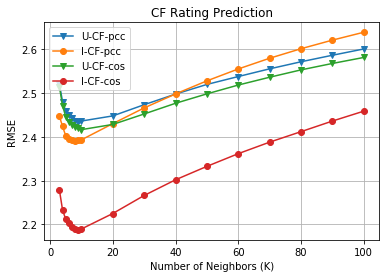

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
#draw the graph
idx = [3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
plt.plot(idx, rmse_user, marker='v', label='U-CF-pcc')
plt.plot(idx, rmse_item, marker='o', label='I-CF-pcc')
plt.plot(idx, rmse_user_cos, marker='v', label='U-CF-cos')
plt.plot(idx, rmse_item_cos, marker='o', label='I-CF-cos')

plt.title('CF Rating Prediction')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.grid()
plt.show()